### Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from IPython.display import clear_output
import numpy as np
import pyaudio
import time
import wave
import sys

import warnings
warnings.filterwarnings("ignore")

### Record

In [11]:
int((RATE / CHUNK) * 2)

882

In [48]:
def record_wav(filepath, CHUNK=1024, FORMAT=pyaudio.paInt16, CHANNELS=1, RATE=44100):
    p = pyaudio.PyAudio()
    stream = p.open(
        format = FORMAT,
        channels = CHANNELS,
        rate = RATE,
        input = True,
        frames_per_buffer = CHUNK
    )

    frames = []
    for i in range(0, int((RATE / CHUNK) * 2)):
        data = stream.read(CHUNK)
        frames.append(data)

    stream.stop_stream()
    stream.close()
    p.terminate()

    wf = wave.open(filepath, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()

### Plotting

In [49]:
def plot_wav(filepath):
    spf = wave.open(filepath,'r')

    #Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, 'Int16')

    #If Stereo
    if spf.getnchannels() == 2:
        sys.exit(0)

    plt.figure(1)
    plt.title('Signal Wave...')
    plt.plot(signal)
    plt.show()

### Settings

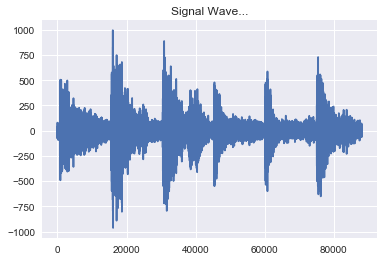

In [50]:
plot_wav("temp.wav")

### Plot Fourier

Plots the fourier transform of the waveform

In [51]:
def plot_fourier(filepath, config):
    config_args = ["noise_cutoff", "range_min", "range_max"]
    assert all([arg in config for arg in config_args]), "Expected the following args as input: %s" % ", ".join(config_args)
    
    ### set variables
    range_min = config["range_min"]
    range_max = config["range_max"]
    noise_cutoff = config["noise_cutoff"]
    
    spf = wave.open(filepath,'r')

    #Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    print(signal)
    signal = np.fromstring(signal, 'Int16')
    
    fft_signal = np.fft.fft(signal)
    fft_signal[:range_min] = 0
    fft_signal[range_max:] = 0
    fft_signal[fft_signal < noise_cutoff] = 0
    # np.clip(fft_signal, range_min, range_max)
    plt.plot(fft_signal)
    plt.xlim(range_min, range_max)
    plt.show()

### Main

b'n\x00+\x00\xc0\x00\x88\x00\xd5\xff?\x00\x85\x00\xbc\xff/\xff\xa3\xff\xf9\xff{\xff\xae\xff]\x00\xcc\xff\x08\xff\x9e\xffe\x00O\x00n\x00\xf0\x00}\x00\x96\xff\xae\xff-\x00\xea\xff~\xff\xd7\xff\xec\xffF\xff\x7f\xffM\x00\x1c\x00\xaa\xff\x08\x00g\x00\x0c\x00\xf3\xff\x8f\x00Z\x00l\xffd\xff\xee\xff\xf8\xff\xff\xff\x97\x00\xb0\x00\xe1\xff\xa7\xff1\x00J\x00\x1a\x00V\x00a\x00\xbb\xff\x84\xff"\x007\x00\xd8\xff\xcf\xff\xaa\xff\x1b\xff\xc8\xfeK\xff\xdf\xff\xed\xff>\x00\xb3\x00\x8d\x00G\x00\xa1\x00\x11\x01\xcd\x00\x80\x00|\x00\x13\x00\x80\xffU\xff7\xff\xe1\xfe\xd2\xfe[\xff\xbe\xff\xf4\xff\x97\x00\x10\x01\x18\x01>\x01\x87\x01t\x01\xd4\x00b\x00\x1d\x00p\xff\xf2\xfe\xf4\xfe\x1a\xff\x1c\xff;\xff\xb6\xff\x02\x00?\x00\xb0\x00\x0e\x01\x16\x01\xd4\x00\x93\x00=\x00\xe7\xff\xc1\xff\x87\xff\x10\xff\xa0\xfe\xb4\xfe\x11\xff|\xff\x1f\x00\xb7\x00\xe0\x00\xaf\x00\xb4\x00\xe8\x00\xeb\x00\xb8\x00N\x00\xa6\xff\xc4\xfe1\xfe_\xfe\xef\xfey\xff\xbf\xff\xf7\xff:\x00n\x00\xee\x00\x88\x01\x93\x01\x1a\x01\x9c\x00,\x00\x83\xff

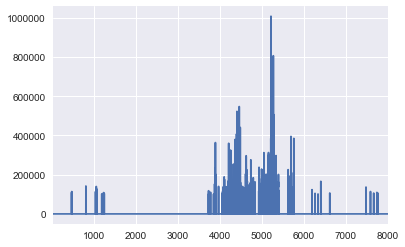

In [52]:
### Configure
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
filename = "temp.wav"

config = {
    "noise_cutoff": 100000,
    "range_min": 12,   # c0 is 16.35 Hz
    "range_max": 8000, # b8 is 7902.13 Hz
}

### Main
for _ in range(3):
    clear_output()
    record_wav(filename, CHUNK=CHUNK, FORMAT=FORMAT, CHANNELS=CHANNELS, RATE=RATE)
    plot_fourier(filename, config)

In [61]:
def open_stream(CHUNK=1024, FORMAT=pyaudio.paInt16, CHANNELS=1, RATE=44100):
    p = pyaudio.PyAudio()
    stream = p.open(
        format = FORMAT,
        channels = CHANNELS,
        rate = RATE,
        input = True,
        frames_per_buffer = CHUNK
    )
    return p, stream

def record_wav(stream, N, CHUNK):
    frames = []
    for i in range(N):
        data = stream.read(CHUNK)
        frames.append(data)
    return np.fromstring(b"".join(frames), 'Int16')

def close_stream(p, stream):
    stream.stop_stream()
    stream.close()
    p.terminate()

def sample(seconds, CHUNK=1024, FORMAT=pyaudio.paInt16, CHANNELS=1, RATE=44100):
    N = int(seconds / (CHUNK / RATE))
    p, stream = open_stream(CHUNK=1024, FORMAT=pyaudio.paInt16, CHANNELS=1, RATE=44100)
    data = record_wav(stream, N, CHUNK)
    close_stream(p, stream)
    return data

In [ ]:
for _ in range(3):
    data = sample(.2)
    plt.plot(data)

KeyboardInterrupt: 